In [1]:
import lightkurve as lk
import astropy.table as astab
import pandas as pd
import astropy
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from tqdm import tqdm
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)
import warnings

warnings.filterwarnings("ignore",message='ERROR:lightkurve.search')
# warnings.filterwarnings('ignore', message=f'No data found for target')
print(astropy.__version__)
dd = "/Users/kjaehnig/CCA_work/GAT/"

Populating the interactive namespace from numpy and matplotlib
4.3.1


### load in all big files to use here

In [2]:
allstarlite = astab.Table.read(dd+'dr17_joker/allStarLite-dr17-synspec.fits',format='fits', hdu=1)
allvis_verr = astab.Table.read(dd+"dr17_joker/allVisit-dr17-synspec-calib-verr.fits", format='fits', hdu=1)
allvis = astab.Table.read(dd+"dr17_joker/allVisit-dr17-synspec.fits", format='fits', hdu=1)
print(allstarlite.columns)
print(allvis.columns)
print("#"*50)

apogee_edr3 = astab.Table.read(dd+"dr17_joker/allStar-dr17-synspec-gaiaedr3-xm.fits", format='fits', hdu=1)
print(len(np.unique(apogee_edr3['APOGEE_ID'])), len(apogee_edr3['APOGEE_ID']))
print(apogee_edr3.columns)
print("#"*50)


apogee_tess = astab.Table.read(dd+"dr17_joker/allStar-dr17-synspec-tess-xm.fits", format='fits', hdu=1)
print(len(np.unique(apogee_tess['APOGEE_ID'])), len(apogee_tess['APOGEE_ID']))
print(apogee_tess.columns)
print("#"*50)

jk_unimod = astab.Table.read(dd+'dr17_joker/unimodal.fits',format='fits',hdu=1)
print(len(np.unique(jk_unimod['APOGEE_ID'])), len(jk_unimod['APOGEE_ID']))
print(jk_unimod.columns)# print(jk_unimod.info)
print("#"*50)

jk_meta = astab.Table.read(dd+"dr17_joker/apJoker-metadata.fits", format='fits', hdu=1)
print(jk_meta.columns)


<TableColumns names=('FILE','APOGEE_ID','TELESCOPE','LOCATION_ID','FIELD','RA','DEC','J','H','K','APOGEE_TARGET1','APOGEE_TARGET2','APOGEE2_TARGET1','APOGEE2_TARGET2','APOGEE2_TARGET3','APOGEE2_TARGET4','NVISITS','SNR','STARFLAG','ANDFLAG','VHELIO_AVG','VSCATTER','VERR','N_COMPONENTS','GAIAEDR3_SOURCE_ID','GAIAEDR3_PARALLAX','GAIAEDR3_PMRA','GAIAEDR3_PMDEC','GAIAEDR3_PHOT_G_MEAN_MAG','GAIAEDR3_PHOT_BP_MEAN_MAG','GAIAEDR3_PHOT_RP_MEAN_MAG','TEFF','TEFF_ERR','LOGG','LOGG_ERR','M_H','M_H_ERR','ALPHA_M','ALPHA_M_ERR','VMICRO','VMACRO','VSINI','C_FE','C_FE_ERR','CI_FE','CI_FE_ERR','N_FE','N_FE_ERR','O_FE','O_FE_ERR','NA_FE','NA_FE_ERR','MG_FE','MG_FE_ERR','AL_FE','AL_FE_ERR','SI_FE','SI_FE_ERR','P_FE','P_FE_ERR','S_FE','S_FE_ERR','K_FE','K_FE_ERR','CA_FE','CA_FE_ERR','TI_FE','TI_FE_ERR','TIII_FE','TIII_FE_ERR','V_FE','V_FE_ERR','CR_FE','CR_FE_ERR','MN_FE','MN_FE_ERR','FE_H','FE_H_ERR','CO_FE','CO_FE_ERR','NI_FE','NI_FE_ERR','CU_FE','CU_FE_ERR','CE_FE','CE_FE_ERR','ND_FE','ND_FE_ERR','APSTAR

(array([1.1732e+04, 2.6020e+03, 3.3590e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([0.0000000e+00, 3.2498209e+00, 6.4996419e+00, ..., 4.4620044e+03,
        4.4652539e+03, 4.4685039e+03], dtype=float32),
 <BarContainer object of 1375 artists>)

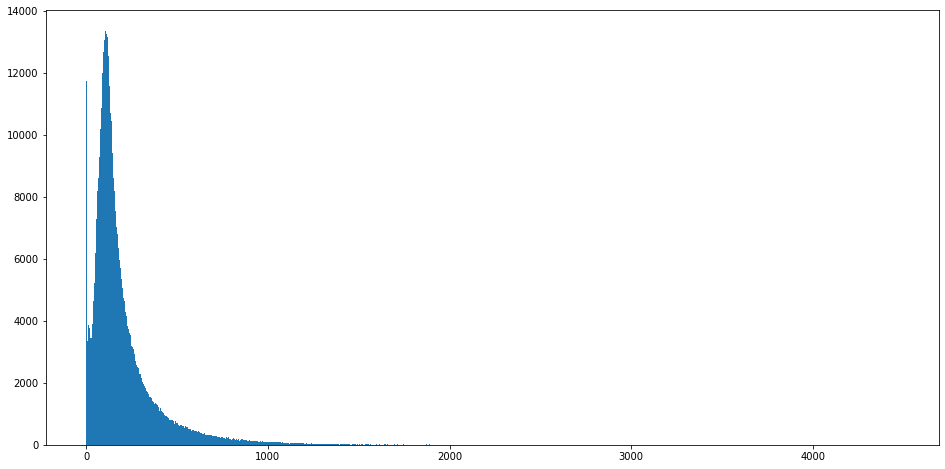

In [3]:
fig,ax = plt.subplots()
ax.hist((allstarlite['SNR']), bins='auto')

In [4]:
print(f"nrows in jk_unimod :{len(jk_unimod)}, n_unique_ids in jk_unimod:{len(np.unique(jk_unimod['APOGEE_ID']))}")
print(f"nrows in allstar :{len(allstarlite)}, n_unique_ids in allstar:{len(np.unique(allstarlite['APOGEE_ID']))}")

jk_allstar = astab.join(jk_unimod, astab.unique(allstarlite, keys='APOGEE_ID'), keys=['APOGEE_ID','APOGEE_ID'], join_type='inner')
print(f"nrows in inner joined :{len(jk_allstar)}, n_unique_ids in inner joined:{len(np.unique(jk_allstar['APOGEE_ID']))}")

# jk_allstar = astab.join(jk_unimod, astab.unique(allstarlite, keys='APOGEE_ID'), keys=['APOGEE_ID','APOGEE_ID'], join_type='left')
# print(f"nrows in left joined :{len(jk_allstar)}, n_unique_ids in left joined:{len(np.unique(jk_allstar['APOGEE_ID']))}")


nrows in jk_unimod :2666, n_unique_ids in jk_unimod:2666
nrows in allstar :733901, n_unique_ids in allstar:657135
nrows in inner joined :2666, n_unique_ids in inner joined:2666


2666


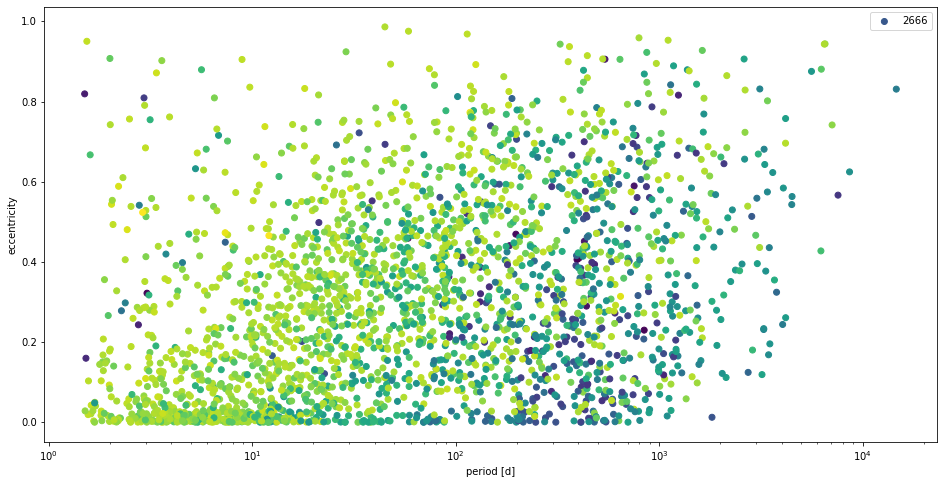

In [5]:
# au_samp_allstar = astab.join(jk_unimod, allstarlite, keys=['APOGEE_ID', 'APOGEE_ID'], join_type='inner')
print(len(jk_allstar['APOGEE_ID']))

fig,ax = plt.subplots()
ax.scatter(jk_allstar['MAP_P'], jk_allstar['MAP_e'],
           label=len(jk_allstar['MAP_e']), c=jk_allstar['LOGG'])
ax.legend()
ax.set_xlabel('period [d]')
ax.set_ylabel("eccentricity")
# ax.set_yscale("log")
ax.set_xscale("log")

52
(2660,)
2660
(2636,)
2636
(2636,)


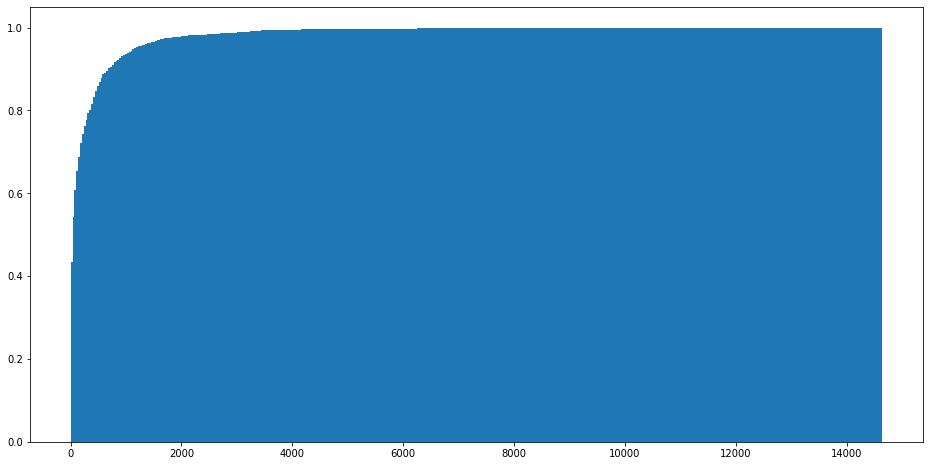

In [6]:
whelan_mask_conds = (jk_allstar['LOGG'] > -.5) & (jk_allstar['LOGG'] < 5.5) & \
            (jk_allstar['TEFF'] < 3500) & (jk_allstar['TEFF'] < 10000) & \
            (jk_allstar['M_H'] > -2.5) & (jk_allstar['M_H'] < 0.5) & \
            (jk_allstar['n_visits'] > 5) & \
            (jk_allstar['MAP_s'] < 0.5)
print(np.sum(whelan_mask_conds))

hq_jk_allstar = jk_allstar[jk_allstar['MAP_s'] < 0.5]
# print(np.unique(low_s_jk_allstar['APOGEE_ID']).shape)
# print(len(low_s_jk_allstar))

hq_jk_allstar_tess = astab.join(hq_jk_allstar, astab.unique(apogee_tess,keys='APOGEE_ID'), 
                                    keys=['APOGEE_ID','APOGEE_ID'])
print(np.unique(hq_jk_allstar_tess['ID']).shape)
print(len(hq_jk_allstar_tess))


hq_jk_allstar_tess_edr3 = astab.join(hq_jk_allstar_tess, astab.unique(apogee_edr3,keys='APOGEE_ID'), 
                                     keys=['APOGEE_ID', 'APOGEE_ID'])
print(np.unique(hq_jk_allstar_tess_edr3['APOGEE_ID']).shape)
print(len(hq_jk_allstar_tess_edr3))


fig,ax = plt.subplots()
ax.hist(hq_jk_allstar_tess_edr3['MAP_P'],bins='auto', density=True, cumulative=True)
print(np.unique(hq_jk_allstar_tess_edr3['ID']).shape)


# print(uber_au_samp['MAP_s'][:10])
# print(np.sort(uber_au_samp['MAP_s'])
# print(uber_au_edr3.info)

In [7]:
hq_jk_allstar_tess_edr3.write(dd+"hq_jk_allstar_tess_edr3.fits", format='fits')

In [7]:
print(hq_jk_allstar_tess_edr3.columns)

<TableColumns names=('APOGEE_ID','n_visits','MAP_P','MAP_P_err','MAP_e','MAP_e_err','MAP_omega','MAP_omega_err','MAP_M0','MAP_M0_err','MAP_K','MAP_K_err','MAP_v0','MAP_v0_err','MAP_s','MAP_s_err','MAP_t0_bmjd','t_ref_bmjd','baseline','MAP_ln_likelihood','MAP_ln_prior','max_unmarginalized_ln_likelihood','max_phase_gap','periods_spanned','phase_coverage','phase_coverage_per_period','unimodal','joker_completed','mcmc_completed','mcmc_status','gelman_rubin_max','constant_ln_likelihood','robust_constant_ln_likelihood','robust_constant_mean','robust_constant_scatter','robust_constant_success','robust_linear_ln_likelihood','robust_linear_a','robust_linear_b','robust_linear_scatter','robust_linear_success','FILE','TELESCOPE','LOCATION_ID','FIELD','RA','DEC','J','H','K','APOGEE_TARGET1','APOGEE_TARGET2','APOGEE2_TARGET1','APOGEE2_TARGET2','APOGEE2_TARGET3','APOGEE2_TARGET4','NVISITS','SNR','STARFLAG','ANDFLAG','VHELIO_AVG','VSCATTER','VERR','N_COMPONENTS','GAIAEDR3_SOURCE_ID','GAIAEDR3_PARALLAX

(21.370759272575377, 7.025967812538147)

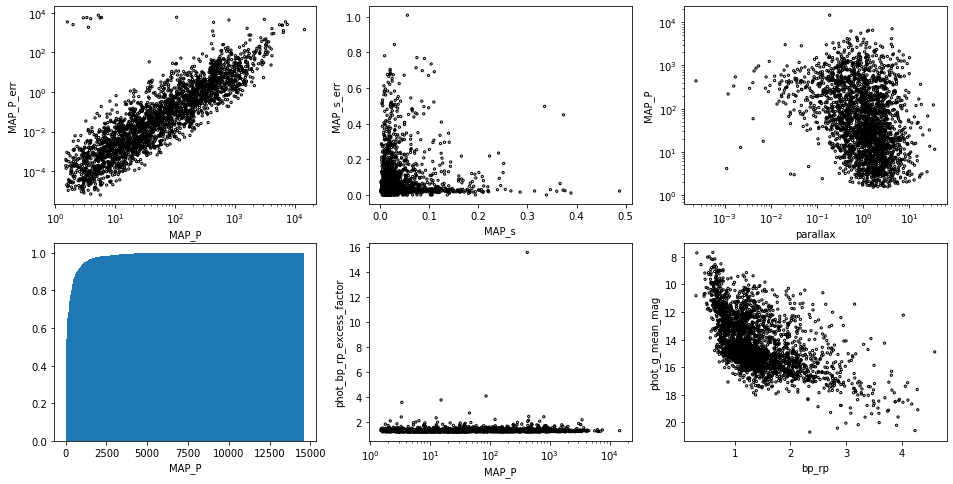

In [34]:
plot_cols = [['MAP_P','MAP_P_err'],
             ['MAP_s','MAP_s_err'],
             ['parallax','MAP_P'],
             ['MAP_P'],
             ['MAP_P','phot_bp_rp_excess_factor'],
             ['bp_rp','phot_g_mean_mag']]

fig, ax = plt.subplots(nrows=2,ncols=3)
for indx, dat in enumerate(plot_cols):
    if len(dat) == 2:
        ax.flatten()[indx].scatter(hq_jk_allstar_tess_edr3[dat[0]],hq_jk_allstar_tess_edr3[dat[1]],
                                   s=5,ec='black',fc='None')
        ax.flatten()[indx].set_xlabel(dat[0])
        ax.flatten()[indx].set_ylabel(dat[1])
    if len(dat) == 1:
        ax.flatten()[indx].hist(hq_jk_allstar_tess_edr3[dat[0]], bins='auto',density=True,cumulative=True)
        ax.flatten()[indx].set_xlabel(dat[0])
        
ax[0,0].loglog(True)
ax[0,2].loglog(True)
ax[1,1].set_xscale("log")
y1,y2 = ax[1,2].set_ylim()
ax[1,2].set_ylim(y2,y1)

(array([192., 334., 425., 419., 390., 351., 338., 141.,  39.,   7.]),
 array([0.17640161, 0.57532865, 0.97425569, 1.37318272, 1.77210976,
        2.1710368 , 2.56996384, 2.96889088, 3.36781792, 3.76674496,
        4.165672  ]),
 <BarContainer object of 10 artists>)

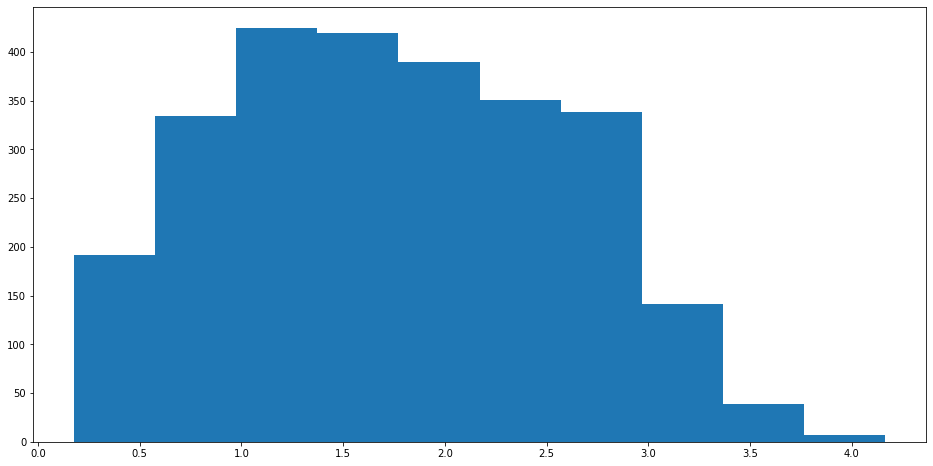

In [152]:
fig,ax = plt.subplots()
ax.hist(np.log10(hq_jk_allstar_tess_edr3['MAP_P']))

#### download all lightcurves from gold sample with MAP_P < 10days ~500 systems

In [ ]:
all_tic_ids = [f'TIC {tic}' for tic in uber_au_tess['ID'][uber_au_tess['MAP_P'] < 10]]
print(np.unique(all_tic_ids).shape)
edr3apotess_lks_p10 = []
ids_w_lks_p10 = []
for indx,tic in enumerate(np.unique(all_tic_ids)):
    try:
        edr3apotess_lk_search = lk.search_lightcurve(tic,
                                                 mission='TESS',
                                                 exptime='short')
    except:
        pass
    if len(edr3apotess_lk_search) > 0 :
        edr3apotess_lks_p10.append(edr3apotess_lk_search)
        ids_w_lks_p10.append(tic.split(' ')[1])
#     print('\033[1A')
print(ids_w_lks_p10)
print(len(ids_w_lks_p10))

#### download all lightcurves from gold sample with MAP_P < 25days ~ 1000 systems

In [59]:
all_tic_ids = [f'TIC {tic}' for tic in uber_au_tess['ID'][uber_au_tess['MAP_P'] < 25]]
print(np.unique(all_tic_ids).shape)
edr3apotess_lks_p25 = []
ids_w_lks_p25 = []
for indx,tic in enumerate(np.unique(all_tic_ids)):
    try:
        edr3apotess_lk_search = lk.search_lightcurve(tic,
                                                 mission='TESS',
                                                 exptime='short')
    except:
        pass
    if len(edr3apotess_lk_search) > 0 :
        edr3apotess_lks_p25.append(edr3apotess_lk_search)
        ids_w_lks_p25.append(tic.split(' ')[1])
#     print('\033[1A')
print(ids_w_lks_p25)
print(len(ids_w_lks_p25))

(987,)
['11893760', '121277143', '122507978', '126232983', '138291351', '139205304', '141414217', '144424576', '144441148', '148683227', '150389428', '158561566', '164458426', '164527723', '165453878', '169467727', '18084644', '183802589', '20215452', '219694227', '251077737', '252798868', '255928834', '258108067', '269655424', '271548206', '272074664', '277298771', '28159019', '28188792', '28240436', '293478824', '30313682', '307752346', '32792896', '333658412', '344891255', '350093561', '358154514', '359122805', '365204192', '367564872', '38515566', '39139656', '392381322', '39948126', '399965207', '417170790', '423571075', '425825018', '439907848', '439907885', '453823509', '461630038', '462589093', '49823764', '49907420', '55725430', '58285542', '82546444', '90571524', '9429166', '97757876', '99254945']
64


#### download all lightcurves from the gold sample ~ 2500 systems

In [61]:
all_tic_ids = [f'TIC {tic}' for tic in hq_jk_allstar_tess_edr3['ID']]
print(np.unique(all_tic_ids).shape)
edr3apotess_lks = []
ids_w_lks = []
for indx,tic in enumerate(np.unique(all_tic_ids)):
    try:
        edr3apotess_lk_search = lk.search_lightcurve(tic,
                                                 mission='TESS',
                                                 exptime='short',
                                                author='SPOC')
        ### add to lightkurve search author='SPOC}'
    except:
        pass
    if len(edr3apotess_lk_search) > 0 :
        edr3apotess_lks.append(edr3apotess_lk_search)
        ids_w_lks.append(tic.split(' ')[1])
#     print('\033[1A')
print(ids_w_lks)
print(len(ids_w_lks))
print(ids_w_lks[71])

(2636,)


No data found for target "TIC 101162934".
ERROR:lightkurve.search:No data found for target "TIC 101162934".
No data found for target "TIC 101163441".
ERROR:lightkurve.search:No data found for target "TIC 101163441".
No data found for target "TIC 101220539".
ERROR:lightkurve.search:No data found for target "TIC 101220539".
No data found for target "TIC 101256093".
ERROR:lightkurve.search:No data found for target "TIC 101256093".
No data found for target "TIC 101643375".
ERROR:lightkurve.search:No data found for target "TIC 101643375".
No data found for target "TIC 101644539".
ERROR:lightkurve.search:No data found for target "TIC 101644539".
No data found for target "TIC 103836714".
ERROR:lightkurve.search:No data found for target "TIC 103836714".
No data found for target "TIC 103891277".
ERROR:lightkurve.search:No data found for target "TIC 103891277".
No data found for target "TIC 1045636".
ERROR:lightkurve.search:No data found for target "TIC 1045636".
No data found for target "TIC 10

['101220299', '118589804', '11893760', '121277143', '122507978', '126232983', '138291351', '139205304', '141414217', '144424576', '144441148', '148683227', '149539552', '149990098', '150389428', '158324163', '160072933', '162555615', '162595188', '164458426', '164527723', '165453878', '169467727', '169820068', '180618091', '18084644', '183802589', '184087603', '198418762', '199497770', '20215452', '202371935', '219694227', '230064750', '232540911', '236378504', '251077737', '251083146', '25153544', '252798868', '255928834', '255928963', '258108067', '261205404', '269655424', '271548206', '272074664', '277298771', '28159019', '28188792', '28240436', '293478824', '297823453', '30313682', '307752346', '307857044', '32792896', '328997191', '333658412', '344891255', '350093561', '350093910', '357345105', '357345482', '358154514', '359119527', '359121632', '359122805', '365204192', '367564872', '38515566', '39139656', '392381322', '393799536', '396928724', '39948126', '399965207', '406801175

In [57]:
import astroquery as astq
astq.mast.Catalogs.query_object_async('TIC 38515566',catalog='TIC',radius=0.05*u.arcsecond)
import ticgen
teststar = hq_jk_allstar_tess_edr3[60]
mag_dict = {'Jmag':teststar['J'],
            'Hmag':teststar['H'],
            'Ksmag':teststar['K'],
            'Gmag':teststar['phot_g_mean_mag']
           }
mag,_ = ticgen.calc_star(mag_dict)

TESS mag = 12.21, calculated using J/Ks.
1-sigma scatter in 60 min = 676 ppm.


##### simple forloop to download and save to fits all lightcurves

In [63]:
for ii,lkdata in enumerate(edr3apotess_lks):
    ticlk = edr3apotess_lks[ii]
    ticlk = ticlk.download_all().stitch(corrector_func=None)
    tic_label = ticlk.Label.replace(' ','_')
    ticlk.to_fits(f"gold_short_lightcurves/{tic_label}_tess_SPOC_short_lightcurve.fits")

101220299 101220299
1662.8300079077749 1750.8677978515625 88.03778994378763 1838.9055877953501


['TIC', '101220299']
1662.8300079077749 d
TESS mag = 9.05, calculated using J/Ks.
1-sigma scatter in 60 min = 134 ppm.
118589804 118589804
35.91590963297625 39.30328415632708 3.3873745233508323 42.69065867967791


['TIC', '118589804']
35.91590963297625 d
TESS mag = 11.23, calculated using J/Ks.
1-sigma scatter in 60 min = 380 ppm.


11893760 11893760
23.060987648966297 23.061281204223633 0.000293555257337097 23.06157475948097
['TIC', '11893760']
23.061505411091847 d
TESS mag = 9.29, calculated using J/Ks.
1-sigma scatter in 60 min = 148 ppm.


121277143 121277143
21.49979703327518 21.50343894958496 0.0036419163097800578 21.507080865894743
['TIC', '121277143']
21.49979703327518 d
TESS mag = 10.04, calculated using J/Ks.
1-sigma scatter in 60 min = 206 ppm.


122507978 122507978
18.637142376608605 18.639301300048828 0.0021589234402235036 18.64146022348905
['TIC', '122507978']
18.637142376608605 d
TESS mag = 10.89, calculated using J/Ks.
1-sigma scatter in 60 min = 317 ppm.


126232983 126232983
4.5343763222048015 4.534421443939209 4.51217344075161e-05 4.5344665656736165
['TIC', '126232983']
4.534378490216064 d
TESS mag = 10.28, calculated using J/Ks.
1-sigma scatter in 60 min = 232 ppm.


138291351 138291351
11.407876325945363 11.408870697021484 0.0009943710761222135 11.409865068097606
['TIC', '138291351']
11.407876325945363 d
TESS mag = 12.80, calculated using J/Ks.
1-sigma scatter in 60 min = 982 ppm.


139205304 139205304
19.62749604730549 19.66426658630371 0.0367705389982218 19.701037125301934
['TIC', '139205304']
19.694411802959912 d
TESS mag = 9.95, calculated using J/Ks.
1-sigma scatter in 60 min = 198 ppm.


141414217 141414217
10.03109831734009 10.046422004699707 0.015323687359616756 10.061745692059324
['TIC', '141414217']
10.042755977393453 d
TESS mag = 9.07, calculated using J/Ks.
1-sigma scatter in 60 min = 136 ppm.


144424576 144424576
8.66246270700167 8.662668228149414 0.00020552114774563535 8.662873749297159
['TIC', '144424576']
8.66262975722386 d
TESS mag = 8.51, calculated using J/Ks.
1-sigma scatter in 60 min = 110 ppm.


144441148 144441148
5.818386428337209 5.818473815917969 8.738758076032305e-05 5.818561203498729
['TIC', '144441148']
5.818459732433983 d
TESS mag = 8.65, calculated using J/Ks.
1-sigma scatter in 60 min = 115 ppm.


148683227 148683227
7.381708683664105 7.38176155090332 5.286723921571479e-05 7.381814418142536
['TIC', '148683227']
7.381734085340604 d
TESS mag = 8.50, calculated using J/Ks.
1-sigma scatter in 60 min = 110 ppm.


149539552 149539552
28.53719316027239 28.55908203125 0.021888870977607944 28.58097090222761
['TIC', '149539552']
28.539515703138882 d
TESS mag = 9.36, calculated using J/Ks.
1-sigma scatter in 60 min = 152 ppm.


149990098 149990098
543.0554161610783 547.3533325195312 4.297916358452966 551.6512488779842
['TIC', '149990098']
543.0554161610783 d
TESS mag = 8.34, calculated using J/Ks.
1-sigma scatter in 60 min = 104 ppm.


150389428 150389428
6.724429524239107 6.725702285766602 0.0012727615274943371 6.726975047294096
['TIC', '150389428']
6.72523471471496 d
TESS mag = 10.53, calculated using J/Ks.
1-sigma scatter in 60 min = 263 ppm.


158324163 158324163
120.35121480538699 120.35981750488281 0.008602699495824595 120.36842020437864
['TIC', '158324163']
120.35121480538699 d
TESS mag = 9.28, calculated using J/Ks.
1-sigma scatter in 60 min = 147 ppm.


160072933 160072933
35.32625089748694 35.35474395751953 0.028493060032591444 35.38323701755212


['TIC', '160072933']
35.32625089748694 d
TESS mag = 8.37, calculated using J/Ks.
1-sigma scatter in 60 min = 105 ppm.


162555615 162555615
49.359432990049164 49.389888763427734 0.030455773378568196 49.420344536806304
['TIC', '162555615']
49.39815053978969 d
TESS mag = 8.32, calculated using J/Ks.
1-sigma scatter in 60 min = 103 ppm.


162595188 162595188
27.415389862749578 27.432865142822266 0.017475280072689614 27.450340422894953
['TIC', '162595188']
27.431483213767464 d
TESS mag = 9.21, calculated using J/Ks.
1-sigma scatter in 60 min = 143 ppm.


164458426 164458426
4.693378695112673 4.693449020385742 7.032527306893854e-05 4.693519345658811
['TIC', '164458426']
4.693382637270123 d
TESS mag = 11.80, calculated using J/Ks.
1-sigma scatter in 60 min = 527 ppm.


164527723 164527723
2.739530786578295 2.7397408485412598 0.00021006196296446955 2.7399509105042243
['TIC', '164527723']
2.739892875367309 d
TESS mag = 11.26, calculated using J/Ks.
1-sigma scatter in 60 min = 387 ppm.


165453878 165453878
2.70194177683692 2.7032363414764404 0.0012945646395208232 2.704530906115961
['TIC', '165453878']
2.704530906115961 d
TESS mag = 11.15, calculated using J/Ks.
1-sigma scatter in 60 min = 365 ppm.


169467727 169467727
19.560499182227474 19.561363220214844 0.0008640379873714465 19.562227258202213
['TIC', '169467727']
19.560961040370874 d
TESS mag = 10.52, calculated using J/Ks.
1-sigma scatter in 60 min = 261 ppm.


169820068 169820068
29.741474821718974 29.74237060546875 0.0008957837497769461 29.743266389218526
['TIC', '169820068']
29.74147482171897 d
TESS mag = 11.45, calculated using J/Ks.
1-sigma scatter in 60 min = 430 ppm.


180618091 180618091
65.94263617804688 65.97044372558594 0.027807547539058675 65.99825127312499
['TIC', '180618091']
65.94263617804688 d
TESS mag = 11.51, calculated using J/Ks.
1-sigma scatter in 60 min = 446 ppm.


18084644 18084644
6.224442447805096 6.224518775939941 7.63281348459266e-05 6.224595104074787
['TIC', '18084644']
6.224472704002692 d
TESS mag = 12.48, calculated using J/Ks.
1-sigma scatter in 60 min = 799 ppm.


183802589 183802589
4.998090971816825 4.998144149780273 5.317796344872505e-05 4.998197327743722
['TIC', '183802589']
4.998194346796822 d
TESS mag = 8.81, calculated using J/Ks.
1-sigma scatter in 60 min = 122 ppm.


184087603 184087603
33.002084937715196 33.002899169921875 0.0008142322066770902 33.003713402128554
['TIC', '184087603']
33.002084937715196 d
TESS mag = 12.95, calculated using J/Ks.
1-sigma scatter in 60 min = 1086 ppm.


198418762 198418762
64.42423664990753 64.43247985839844 0.008243208490902987 64.44072306688935
['TIC', '198418762']
64.43413840184856 d
TESS mag = 11.46, calculated using J/Ks.
1-sigma scatter in 60 min = 433 ppm.


199497770 199497770
57.69312252613571 57.79574203491211 0.10261950877640302 57.89836154368851
['TIC', '199497770']
57.69312252613571 d
TESS mag = 9.97, calculated using J/Ks.
1-sigma scatter in 60 min = 200 ppm.


20215452 20215452
3.0677105098354724 3.067790985107422 8.047527194932069e-05 3.0678714603793713
['TIC', '20215452']
3.067870010374471 d
TESS mag = 11.93, calculated using J/Ks.
1-sigma scatter in 60 min = 572 ppm.


202371935 202371935
122.75844720126 125.59539794921875 2.8369507479587526 128.4323486971775


['TIC', '202371935']
122.75844720126001 d
TESS mag = 13.79, calculated using J/Ks.
1-sigma scatter in 60 min = 1958 ppm.
219694227 219694227
4.245740838123192 4.24579381942749 5.298130429842729e-05 4.245846800731789
['TIC', '219694227']
4.245844255083534 d
TESS mag = 8.77, calculated using J/Ks.
1-sigma scatter in 60 min = 121 ppm.


230064750 230064750
854.9774301976577 855.8678850293309 0.890454831673253 856.7583398610041
['TIC', '230064750']
854.9774301976577 d
TESS mag = 9.81, calculated using J/Ks.
1-sigma scatter in 60 min = 186 ppm.


232540911 232540911
1758.0598373138878 1772.3280029296875 14.268165615799603 1786.5961685454872
['TIC', '232540911']
1758.0598373138878 d
TESS mag = 10.44, calculated using J/Ks.
1-sigma scatter in 60 min = 251 ppm.


236378504 236378504
398.51339365453964 398.86572265625 0.3523290017103591 399.21805165796036


['TIC', '236378504']
398.51339365453964 d
TESS mag = 8.50, calculated using J/Ks.
1-sigma scatter in 60 min = 110 ppm.


251077737 251077737
20.849645210949895 20.91373062133789 0.06408541038799775 20.977816031725887
['TIC', '251077737']
20.857471457263543 d
TESS mag = 11.49, calculated using J/Ks.
1-sigma scatter in 60 min = 441 ppm.


251083146 251083146
45.62224994331141 46.54679870605469 0.924548762743278 47.471347468797966
['TIC', '251083146']
47.06598975300061 d
TESS mag = 9.31, calculated using J/Ks.
1-sigma scatter in 60 min = 149 ppm.


25153544 25153544
418.48488773067226 422.6171569824219 4.132269251749619 426.7494262341715
['TIC', '25153544']
418.48488773067226 d
TESS mag = 9.69, calculated using J/Ks.
1-sigma scatter in 60 min = 176 ppm.


252798868 252798868
6.490258803912731 6.490530967712402 0.0002721637996718762 6.490803131512074
['TIC', '252798868']
6.490664189031761 d
TESS mag = 9.31, calculated using J/Ks.
1-sigma scatter in 60 min = 149 ppm.


255928834 255928834
14.947283603693009 14.947576522827148 0.00029291913414031256 14.947869441961288


['TIC', '255928834']
14.947549840503617 d
TESS mag = 9.74, calculated using J/Ks.
1-sigma scatter in 60 min = 180 ppm.


255928963 255928963
67.52985757576636 67.53362274169922 0.003765165932858139 67.53738790763208


['TIC', '255928963']
67.52985757576636 d
TESS mag = 9.69, calculated using J/Ks.
1-sigma scatter in 60 min = 176 ppm.


258108067 258108067
6.485391080100557 6.490360736846924 0.004969656746367068 6.4953303935932905
['TIC', '258108067']
6.485401029363313 d
TESS mag = 7.81, calculated using J/Ks.
1-sigma scatter in 60 min = 89 ppm.


261205404 261205404
86.3086447728709 95.2947998046875 8.986155031816594 104.2809548365041


['TIC', '261205404']
86.3086447728709 d
TESS mag = 12.31, calculated using J/Ks.
1-sigma scatter in 60 min = 719 ppm.


269655424 269655424
4.102349892016482 4.117931365966797 0.015581473950314617 4.1335128399171115
['TIC', '269655424']
4.109025438413614 d
TESS mag = 7.54, calculated using J/Ks.
1-sigma scatter in 60 min = 83 ppm.


271548206 271548206
7.448318286375121 7.448368549346924 5.026297180199535e-05 7.448418812318726
['TIC', '271548206']
7.448351191263568 d
TESS mag = 14.62, calculated using J/Ks.
1-sigma scatter in 60 min = 3739 ppm.


272074664 272074664
10.47622499202373 10.476256370544434 3.137852070445035e-05 10.476287749065138
['TIC', '272074664']
10.47622499202373 d
TESS mag = 11.87, calculated using J/Ks.
1-sigma scatter in 60 min = 550 ppm.


277298771 277298771
3.0806720586324046 3.080688238143921 1.617951151655639e-05 3.0807044176554372
['TIC', '277298771']
3.0806826830163434 d
TESS mag = 10.47, calculated using J/Ks.
1-sigma scatter in 60 min = 254 ppm.


28159019 28159019
4.618486358684322 4.618557929992676 7.157130835389047e-05 4.6186295013010294
['TIC', '28159019']
4.618508711285129 d
TESS mag = 11.13, calculated using J/Ks.
1-sigma scatter in 60 min = 361 ppm.


28188792 28188792
1.8785831614915813 1.8787511587142944 0.00016799722271310102 1.8789191559370075
['TIC', '28188792']
1.8787405642948443 d
TESS mag = 9.47, calculated using J/Ks.
1-sigma scatter in 60 min = 160 ppm.


28240436 28240436
8.715175521809337 8.71605110168457 0.0008755798752329014 8.716926681559803
['TIC', '28240436']
8.715638290752404 d
TESS mag = 9.10, calculated using J/Ks.
1-sigma scatter in 60 min = 137 ppm.


293478824 293478824
2.8433400773375808 2.8435118198394775 0.00017174250189688767 2.8436835623413743
['TIC', '293478824']
2.8436254552686604 d
TESS mag = 9.36, calculated using J/Ks.
1-sigma scatter in 60 min = 152 ppm.


297823453 297823453
120.08583874340243 121.64701080322266 1.5611720598202155 123.20818286304288
['TIC', '297823453']
120.08583874340242 d
TESS mag = 12.37, calculated using J/Ks.
1-sigma scatter in 60 min = 747 ppm.


30313682 30313682
5.727682372717631 5.7277116775512695 2.9304833638388317e-05 5.727740982384908
['TIC', '30313682']
5.727682372717631 d
TESS mag = 10.04, calculated using J/Ks.
1-sigma scatter in 60 min = 207 ppm.


307752346 307752346
20.358034688430294 20.35893440246582 0.0008997140355244682 20.359834116501347
['TIC', '307752346']
20.358034688430294 d
TESS mag = 10.48, calculated using J/Ks.
1-sigma scatter in 60 min = 256 ppm.


307857044 307857044
45.56954893175259 45.57264709472656 0.0030981629739663674 45.57574525770053


['TIC', '307857044']
45.56954893175259 d
TESS mag = 7.28, calculated using J/Ks.
1-sigma scatter in 60 min = 78 ppm.


32792896 32792896
7.318810511120393 7.371103286743164 0.052292775622771126 7.423396062365935
['TIC', '32792896']
7.342156434972 d
TESS mag = 9.44, calculated using J/Ks.
1-sigma scatter in 60 min = 157 ppm.


328997191 328997191
173.96755933899132 174.33270263671875 0.36514329772742116 174.69784593444618


['TIC', '328997191']
173.96755933899132 d
TESS mag = 8.50, calculated using J/Ks.
1-sigma scatter in 60 min = 110 ppm.


333658412 333658412
6.891356769270869 6.915344715118408 0.02398794584753916 6.939332660965947
['TIC', '333658412']
6.919066568578237 d
TESS mag = 9.77, calculated using J/Ks.
1-sigma scatter in 60 min = 182 ppm.


344891255 344891255
6.653115852945344 6.678831577301025 0.025715724355680702 6.7045473016567065
['TIC', '344891255']
6.697854520543115 d
TESS mag = 10.73, calculated using J/Ks.
1-sigma scatter in 60 min = 291 ppm.


350093561 350093561
13.412071819813766 13.412562370300293 0.0004905504865262422 13.41305292078682
['TIC', '350093561']
13.412132708963245 d
TESS mag = 11.25, calculated using J/Ks.
1-sigma scatter in 60 min = 385 ppm.


350093910 350093910
69.35618544085418 69.37828063964844 0.02209519879426125 69.4003758384427
['TIC', '350093910']
69.35618544085418 d
TESS mag = 11.77, calculated using J/Ks.
1-sigma scatter in 60 min = 518 ppm.


357345105 357345105
32.51283320110507 32.53739547729492 0.024562276189850962 32.561957753484776
['TIC', '357345105']
32.51283320110507 d
TESS mag = 12.39, calculated using J/Ks.
1-sigma scatter in 60 min = 754 ppm.


357345482 357345482
552.8289467324358 556.4108276367188 3.5818809042829116 559.9927085410017


['TIC', '357345482']
552.8289467324358 d
TESS mag = 11.17, calculated using J/Ks.
1-sigma scatter in 60 min = 369 ppm.


358154514 358154514
17.156293067220773 17.15816307067871 0.0018700034579381963 17.16003307413665
['TIC', '358154514']
17.15878640516469 d
TESS mag = 9.90, calculated using J/Ks.
1-sigma scatter in 60 min = 193 ppm.


359119527 359119527
1254.8199130757157 1274.32763671875 19.50772364303441 1293.8353603617843


['TIC', '359119527']
1254.8199130757157 d
TESS mag = 10.20, calculated using J/Ks.
1-sigma scatter in 60 min = 223 ppm.
359121632 359121632
352.09679493871283 352.246826171875 0.15003123316218137 352.39685740503717


['TIC', '359121632']
352.09679493871283 d
TESS mag = 8.83, calculated using J/Ks.
1-sigma scatter in 60 min = 123 ppm.
359122805 359122805
4.646447642420139 4.6464619636535645 1.4321233425818036e-05 4.64647628488699
['TIC', '359122805']
4.646447642420139 d
TESS mag = 11.41, calculated using J/Ks.
1-sigma scatter in 60 min = 422 ppm.


365204192 365204192
3.534565620144087 3.534600019454956 3.439931086912651e-05 3.534634418765825
['TIC', '365204192']
3.534565620144087 d
TESS mag = 8.51, calculated using J/Ks.
1-sigma scatter in 60 min = 110 ppm.


367564872 367564872
24.564390905900026 24.580623626708984 0.01623272080895788 24.596856347517942


['TIC', '367564872']
24.564390905900026 d
TESS mag = 11.71, calculated using J/Ks.
1-sigma scatter in 60 min = 502 ppm.
##################################################
##################################################
##################################################
##################################################
38515566 38515566
0.34 1.5979299545288086 3485.8589586068447 2.396894931793213
['TIC', '38515566']
0.6138408667952926 d
TESS mag = 8.91, calculated using J/Ks.
1-sigma scatter in 60 min = 127 ppm.


39139656 39139656
3.1077182131255054 3.1093437671661377 0.0016255540406323599 3.11096932120677
['TIC', '39139656']
3.1108196205343592 d
TESS mag = 10.04, calculated using J/Ks.
1-sigma scatter in 60 min = 207 ppm.


392381322 392381322
4.434080280864205 4.434248924255371 0.00016864339116651195 4.434417567646538
['TIC', '392381322']
4.434139365135384 d
TESS mag = 8.99, calculated using J/Ks.
1-sigma scatter in 60 min = 131 ppm.


393799536 393799536
135.4926677375915 135.57350158691406 0.08083384932257331 135.65433543623664


['TIC', '393799536']
135.4926677375915 d
TESS mag = 9.54, calculated using J/Ks.
1-sigma scatter in 60 min = 164 ppm.
396928724 396928724
30.55592321860919 30.581819534301758 0.025896315692566674 30.607715849994324


['TIC', '396928724']
30.555923218609195 d
TESS mag = 10.51, calculated using J/Ks.
1-sigma scatter in 60 min = 260 ppm.


39948126 39948126
11.090198990873212 11.092434883117676 0.0022358922444642992 11.09467077536214
['TIC', '39948126']
11.094232101808672 d
TESS mag = 9.46, calculated using J/Ks.
1-sigma scatter in 60 min = 159 ppm.


399965207 399965207
13.337535923152522 13.347199440002441 0.00966351684991995 13.35686295685236
['TIC', '399965207']
13.356785571332042 d
TESS mag = 10.11, calculated using J/Ks.
1-sigma scatter in 60 min = 213 ppm.


406801175 406801175
1408.1812065096003 1469.0586793778082 60.87747286820786 1529.936152246016


['TIC', '406801175']
1408.1812065096003 d
TESS mag = 9.04, calculated using J/Ks.
1-sigma scatter in 60 min = 133 ppm.
40797468 40797468
738.3456204133029 746.8934936523438 8.547873239040939 755.4413668913846
['TIC', '40797468']
738.3456204133029 d
TESS mag = 11.15, calculated using J/Ks.
1-sigma scatter in 60 min = 366 ppm.


408018644 408018644
32.09002657940482 32.10698699951172 0.0169604201068978 32.12394741961862
['TIC', '408018644']
32.09002657940482 d
TESS mag = 11.55, calculated using J/Ks.
1-sigma scatter in 60 min = 457 ppm.


417170790 417170790
15.693744400773788 15.696105003356934 0.0023606025831455213 15.69846560594008
['TIC', '417170790']
15.69417918643475 d
TESS mag = 10.70, calculated using J/Ks.
1-sigma scatter in 60 min = 287 ppm.


423571075 423571075
18.145033095152613 18.40905007141792 0.2640169762653084 18.673067047683226
['TIC', '423571075']
18.474327542026057 d
TESS mag = 8.51, calculated using J/Ks.
1-sigma scatter in 60 min = 110 ppm.


425825018 425825018
3.004680239986465 3.0051610469818115 0.00048080699534669424 3.005641853977158
['TIC', '425825018']
3.0052972515660787 d
TESS mag = 11.60, calculated using J/Ks.
1-sigma scatter in 60 min = 470 ppm.


439907848 439907848
3.1272925823646593 3.127380132675171 8.755031051133066e-05 3.1274676829856825
['TIC', '439907848']
3.1273583108260046 d
TESS mag = 10.50, calculated using J/Ks.
1-sigma scatter in 60 min = 259 ppm.


439907885 439907885
7.0423843017488625 7.04349422454834 0.001109922799477303 7.044604147347817
['TIC', '439907885']
7.04247096238786 d
TESS mag = 9.84, calculated using J/Ks.
1-sigma scatter in 60 min = 188 ppm.


450325128 450325128
35.66520571336117 35.66715621948242 0.00195050612125236 35.669106725603676


['TIC', '450325128']
35.66520571336117 d
TESS mag = 7.62, calculated using J/Ks.
1-sigma scatter in 60 min = 84 ppm.


453823509 453823509
0.34 1.9900354146957397 2549.7552992902383 2.9850531220436096
['TIC', '453823509']
0.34529540164573297 d
TESS mag = 11.85, calculated using J/Ks.
1-sigma scatter in 60 min = 544 ppm.


461618287 461618287
367.8214468098482 368.2106628417969 0.3892160319486777 368.5998788737455
['TIC', '461618287']
367.8214468098482 d
TESS mag = 8.17, calculated using J/Ks.
1-sigma scatter in 60 min = 99 ppm.


461630038 461630038
11.569727083749179 11.581131935119629 0.011404851370449443 11.59253678649008
['TIC', '461630038']
11.590025207609699 d
TESS mag = 9.29, calculated using J/Ks.
1-sigma scatter in 60 min = 148 ppm.


461736494 461736494
39.91593696329217 39.928382873535156 0.012445910242984581 39.940828783778144


['TIC', '461736494']
39.91593696329217 d
TESS mag = 10.97, calculated using J/Ks.
1-sigma scatter in 60 min = 330 ppm.
462589093 462589093
14.800970506344989 14.81496524810791 0.013994741762922036 14.828959989870832


['TIC', '462589093']
14.8191258470104 d
TESS mag = 9.40, calculated using J/Ks.
1-sigma scatter in 60 min = 155 ppm.


462617204 462617204
25.58139206012103 25.59123420715332 0.009842147032291138 25.60107635418561
['TIC', '462617204']
25.589687443305404 d
TESS mag = 10.62, calculated using J/Ks.
1-sigma scatter in 60 min = 276 ppm.


49823764 49823764
15.714316777339064 15.715555191040039 0.001238413700974661 15.716793604741014
['TIC', '49823764']
15.714316777339063 d
TESS mag = 9.53, calculated using J/Ks.
1-sigma scatter in 60 min = 163 ppm.


49907420 49907420
12.001293793076925 12.001731872558594 0.00043807948166918464 12.002169952040262
['TIC', '49907420']
12.002152411320276 d
TESS mag = 11.25, calculated using J/Ks.
1-sigma scatter in 60 min = 385 ppm.


55725430 55725430
6.125027523419054 6.125216960906982 0.00018943748792832338 6.125406398394911
['TIC', '55725430']
6.125027523419054 d
TESS mag = 10.47, calculated using J/Ks.
1-sigma scatter in 60 min = 255 ppm.


58285542 58285542
23.351574455456344 23.352458953857422 0.0008844984010787371 23.3533434522585
['TIC', '58285542']
23.351574455456344 d
TESS mag = 8.70, calculated using J/Ks.
1-sigma scatter in 60 min = 118 ppm.


67682607 67682607
2352.376839092558 2555.1883965717716 202.81155747921377 2757.9999540509853


['TIC', '67682607']
2352.376839092558 d
TESS mag = 9.88, calculated using J/Ks.
1-sigma scatter in 60 min = 192 ppm.


67833039 67833039
1102.8163525646064 1106.86328125 4.046928685393652 1110.9102099353936


['TIC', '67833039']
1102.8163525646064 d
TESS mag = 11.43, calculated using J/Ks.
1-sigma scatter in 60 min = 426 ppm.
77561252 77561252
477.8104500932652 478.38576444257933 0.5753143493141408 478.96107879189344


['TIC', '77561252']
477.8104500932652 d
TESS mag = 9.03, calculated using J/Ks.
1-sigma scatter in 60 min = 133 ppm.
82546444 82546444
12.048973490579709 12.050471305847168 0.0014978152674589573 12.051969121114627
['TIC', '82546444']
12.049528236975064 d
TESS mag = 10.18, calculated using J/Ks.
1-sigma scatter in 60 min = 221 ppm.


90571524 90571524
24.426506215897383 24.43016815185547 0.00366193595808717 24.433830087813554
['TIC', '90571524']
24.426506215897383 d
TESS mag = 14.77, calculated using J/Ks.
1-sigma scatter in 60 min = 4234 ppm.


9429166 9429166
5.850389920511107 5.853728771209717 0.003338850698609175 5.857067621908326
['TIC', '9429166']
5.8538925386614 d
TESS mag = 10.66, calculated using J/Ks.
1-sigma scatter in 60 min = 281 ppm.


97757876 97757876
3.0234637356875167 3.0234715938568115 7.858169294605588e-06 3.0234794520261064
['TIC', '97757876']
3.023477296732426 d
TESS mag = 8.58, calculated using J/Ks.
1-sigma scatter in 60 min = 113 ppm.


99254945 99254945
7.702949399614118 7.703993503945269 0.0010441043311510967 7.70503760827642
['TIC', '99254945']
7.704976989606544 d
TESS mag = 10.88, calculated using J/Ks.
1-sigma scatter in 60 min = 316 ppm.


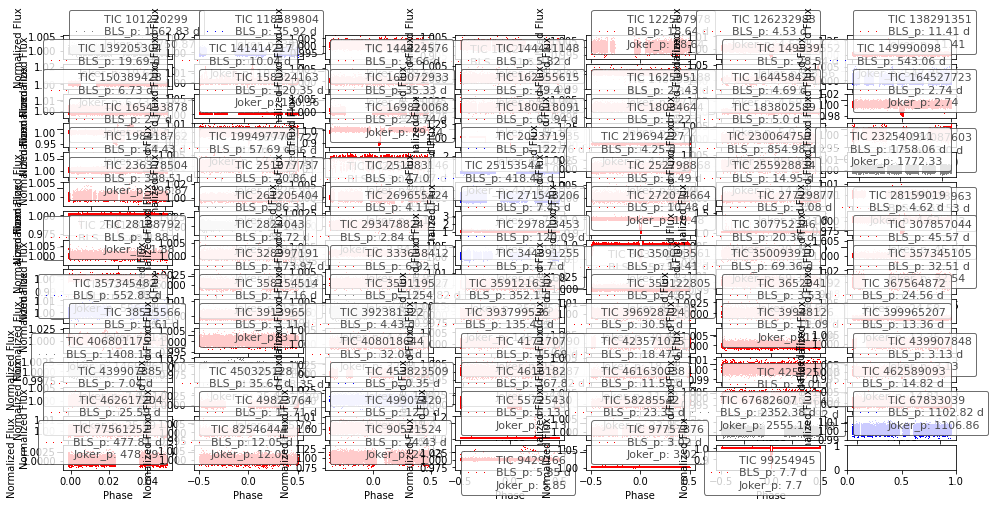

In [113]:
fig2,ax2 = plt.subplots(nrows=15,ncols=7)

bls_res_dict = {'tic_ID' : [],
                'period' : [],
               't0' : [],
               'dur' : [],
               'MAP_P' : [],
               'ts_mag' : [],
               'bp_rp' : [],
               'phot_g_mean_mag' : [],
               'bp' : [],
               'rp' : [],
               }
for indx in range(104):
    id_int = ids_w_lks[indx]
    ticlk = edr3apotess_lks[indx]
    ticlk = ticlk.download_all()
    ticlk = ticlk.stitch().flatten()
#     ticlk = ticlk.normalize()
    
    if id_int == '38515566':
        print("#"*50)
        print("#"*50)
        print("#"*50)
        print("#"*50)


        lk_color='red'
    else: 
        lk_color='blue'
        

    jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(id_int)][0]
    print(jk_row['ID'], id_int)
    assert jk_row['ID'] - int(id_int) == 0
#     np.linspace(np.log(0.35), np.log(10000),10000))
    periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                        min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                          ,1000)
    print(periods.min(), jk_row['MAP_P'], jk_row['MAP_P_err'], periods.max())
    tic_periodogram = ticlk.to_periodogram(method='bls', period=periods, frequency_factor=1000)
    per = tic_periodogram.period_at_max_power
    print(ticlk.Label.split(' '))
    
    print(tic_periodogram.period_at_max_power)
    dur = tic_periodogram.duration_at_max_power
    t0 = tic_periodogram.transit_time_at_max_power
    
    
    mag_dict = {'Jmag':jk_row['J'],
            'Hmag':jk_row['H'],
            'Gmag':jk_row['phot_g_mean_mag'],
            'Ksmag':jk_row['K']
           }
    mag,_ = ticgen.calc_star(mag_dict)
    
    
    bls_res_dict['tic_ID'].append(id_int)
    bls_res_dict['period'].append(per.value)
    bls_res_dict['t0'].append(t0)
    bls_res_dict['dur'].append(dur)
    bls_res_dict['MAP_P'].append(jk_row['MAP_P'])
    bls_res_dict['ts_mag'].append(mag)
    bls_res_dict['phot_g_mean_mag'].append(jk_row['GAIAEDR3_PHOT_G_MEAN_MAG'])
    bls_res_dict['bp'].append(jk_row['GAIAEDR3_PHOT_BP_MEAN_MAG'])
    bls_res_dict['rp'].append(jk_row['GAIAEDR3_PHOT_RP_MEAN_MAG'])
    
    if abs((jk_row['MAP_P'] - per.value)) < 1.0:
        lk_color='red'
    elif abs(jk_row['MAP_P'] - per.value) < 5.0 and abs(jk_row['MAP_P']-per.value > 1.0): 
        lk_color='blue'
    elif abs(jk_row['MAP_P'] -per.value) > 5.0:
        lk_color='gray'
    ticlk.fold(period=per, 
               normalize_phase=True,
               epoch_time=t0,
              ).plot(ax=ax2.flatten()[indx], marker=',', ls='', color=lk_color,
                label=ticlk.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(jk_row['MAP_P'],2)))
#     ticlk.plot(ax=ax2.flatten()[indx], marker=',', ls='', color=lk_color,
#                 label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(jk_row['MAP_P'],2)))

In [111]:
fig2.set_figheight(70)
fig2.set_figwidth(35)
fig2.savefig('figs/tic_lightcurves_all_p_folded.png',dpi=200,bbox_inches='tight')


In [195]:
hq_jk_allstar_tess_edr3.write("dr17_joker/unimodal_joker_sample_joined_w_tess_edr3.fits",format='fits')

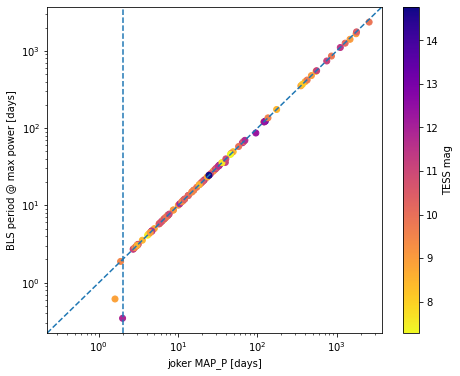

In [262]:
figres = plt.figure(figsize=(7.5,6))
axres = figres.add_subplot(111)
plt.scatter(bls_res_dict['MAP_P'],bls_res_dict['period'],c=bls_res_dict['ts_mag'], cmap=cm.plasma_r)
axres.set_xscale('log')
axres.set_yscale('log')
plt.colorbar(label='TESS mag')
xmin,xmax = axres.set_xlim()
ymin,ymax = axres.set_ylim()
axres.set_xlim(min(xmin,ymin), max(xmax,ymax))
axres.set_ylim(min(xmin,ymin), max(xmax,ymax))

axres.plot([min(xmin,ymin), max(xmax,ymax)],[min(xmin,ymin), max(xmax,ymax)],ls='--')
axres.set_xlabel('joker MAP_P [days]')
axres.set_ylabel("BLS period @ max power [days]")
axres.axvline(2.0, ls='--')

#### reproduce lightcurve for TIC 38515566 (the weird sawtooth lightcurve)

2.943851555895863
1.5979299545288086 3485.8589586068447
6485.672 9.139573 0.53276825
['TIC', '38515566']
0.6138408667952926 d


FileNotFoundError: [Errno 2] No such file or directory: 'figs/sawtooth_lightcurve_folded_and_unfolded.png'

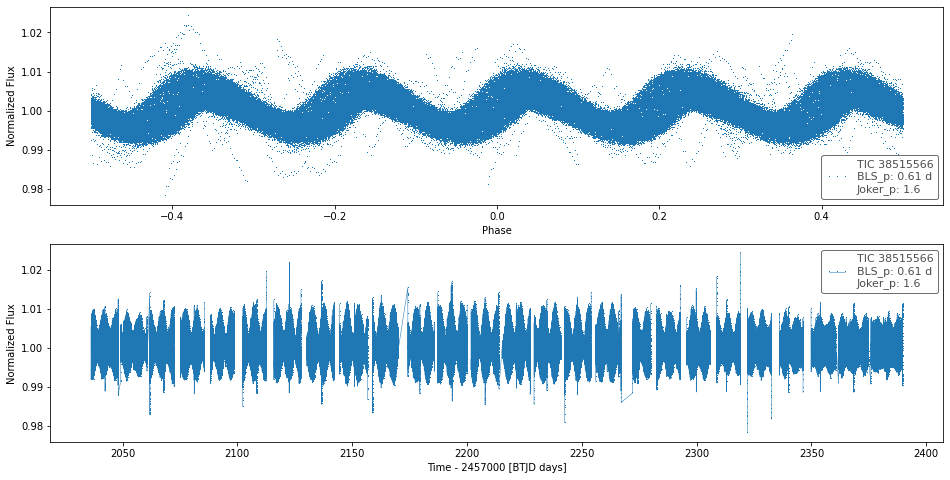

In [8]:
target_tic = 'TIC 38515566'

sawtooth_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = sawtooth_lk.download_all(quality_bitmask='hardest')
lks = lks.stitch().flatten()

# joker_per = hq_jk_allstar_tess_edr3['MAP_P'][hq_jk_allstar_tess_edr3['ID']==38515566][0]
# joker_eper = hq_jk_allstar_tess_edr3['MAP_P_err'][hq_jk_allstar_tess_edr3['ID']==38515566][0]

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
print(jk_row['parallax'])
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
print(jk_row['MAP_P'], jk_row['MAP_P_err'])
print(jk_row['TEFF'], jk_row['phot_g_mean_mag'],jk_row['bp_rp'])
# periods = np.linspace(1,20,10000)
# durs = np.linspace(0.001,0.09,100)

tic_periodogram = lks.to_periodogram(method='bls', period=periods, 
                                     frequency_factor=1000,)
per = tic_periodogram.period_at_max_power
print(lks.Label.split(' '))
print(tic_periodogram.period_at_max_power)
dur = tic_periodogram.duration_at_max_power
t0 = tic_periodogram.transit_time_at_max_power

fig,ax = plt.subplots(nrows=2, ncols=1)
sawtoothfig = lks.fold(period=per, 
           normalize_phase=True,
          ).plot(ax=ax.flatten()[0], marker=',',ls='None',
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))

lks.plot(marker=',',ls=None,ax=ax.flatten()[1],
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
# sawtoothunfolded = lks.plot(ax=ax,
#                     label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
fig.savefig("figs/sawtooth_lightcurve_folded_and_unfolded.png",dpi=150,bbox_inches='tight')


#### reproduce lightcurve for TIC 30313682 (the bat wing)

['TIC', '30313682']
5.727682372717631 d


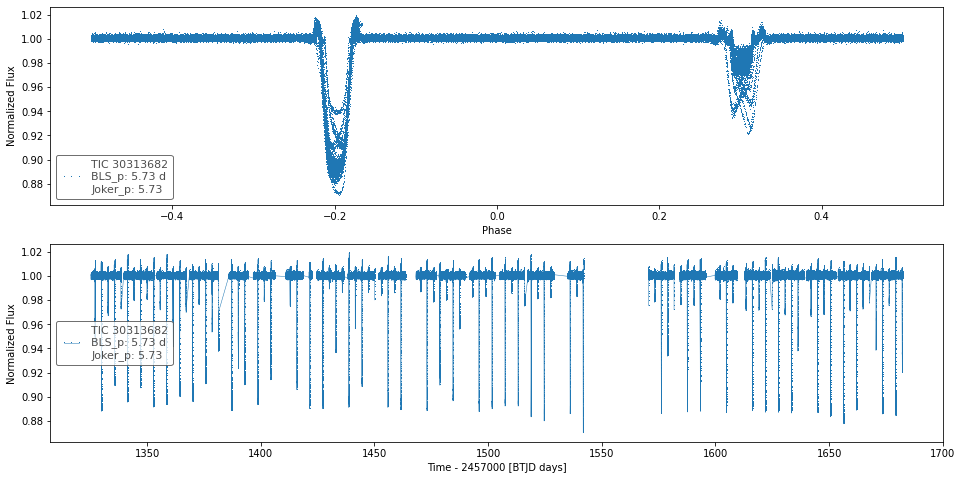

In [135]:
target_tic = 'TIC 30313682'

target_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = target_lk.download_all(quality_bitmask='hardest').stitch().flatten()

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
# periods = np.linspace(1,20,10000)
# durs = np.linspace(0.001,0.09,100)

tic_periodogram = lks.to_periodogram(method='bls', period=periods, 
                                     frequency_factor=1000,)
per = tic_periodogram.period_at_max_power
print(lks.Label.split(' '))
print(tic_periodogram.period_at_max_power)
dur = tic_periodogram.duration_at_max_power
t0 = tic_periodogram.transit_time_at_max_power

fig,ax = plt.subplots(nrows=2, ncols=1)
sawtoothfig = lks.fold(period=per, 
           normalize_phase=True,
          ).plot(ax=ax.flatten()[0], marker=',',ls='None',
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))

lks.plot(marker=',',ls=None,ax=ax.flatten()[1],
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
# sawtoothunfolded = lks.plot(ax=ax,
#                     label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
fig.savefig("figs/sawtooth_lightcurve_folded_and_unfolded.png",dpi=150,bbox_inches='tight')



## reproduce lightcurve for TIC 99254945 (the beat drop)  <---

7.703993503945269 0.0010441043311510967
['TIC', '99254945']
per at max pow:  7.704976989606544 d
dur at max pow:  0.1 d
t0 at max pow:  1901.7684219793173


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

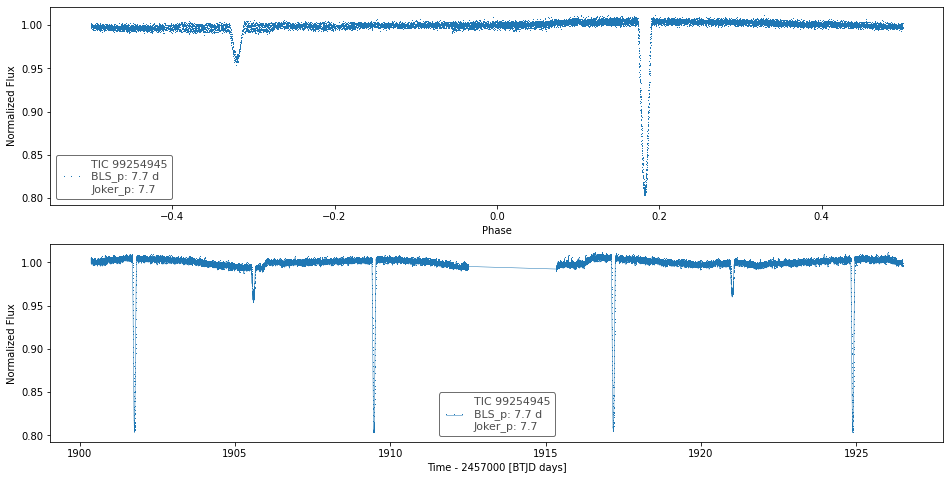

In [10]:
target_tic = 'TIC 99254945'

target_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = target_lk.download_all(quality_bitmask='hardest').stitch()

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
print(joker_per, jk_row['MAP_P_err'])
# periods = np.linspace(1,20,10000)
# durs = np.linspace(0.001,0.09,100)

tic_periodogram = lks.to_periodogram(method='bls', period=periods, 
                                     frequency_factor=1000,)
per = tic_periodogram.period_at_max_power
print(lks.Label.split(' '))
dur = tic_periodogram.duration_at_max_power
t0 = tic_periodogram.transit_time_at_max_power

print('per at max pow: ',tic_periodogram.period_at_max_power)
print('dur at max pow: ', tic_periodogram.duration_at_max_power)
print('t0 at max pow: ',tic_periodogram.transit_time_at_max_power)


fig,ax = plt.subplots(nrows=2, ncols=1)
sawtoothfig = lks.fold(period=per, 
           normalize_phase=True,
          ).plot(ax=ax.flatten()[0], marker=',',ls='None',
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))

lks.plot(marker=',',ls=None,ax=ax.flatten()[1],
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
# sawtoothunfolded = lks.plot(ax=ax,
#                     label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
# fig.savefig("figs/sawtooth_lightcurve_folded_and_unfolded.png",dpi=150,bbox_inches='tight')




In [23]:
print(lks.time.mjd[0], lks.time.mjd.max() - lks.time.mjd.min())
print(lks.time.btjd[0], lks.time.btjd.max() - lks.time.btjd.min())

58899.868421979314 26.128755810161238
1900.3684219793172 26.128755810161238


In [25]:
1901.7684219793173 - lks.time.btjd.min()
lks.time.mjd.min() + 1.4

58901.268421979315

In [11]:
import exoplanet as xo
xo.estimate_semi_amplitude(tic_periodogram.period_at_max_power,
                            )

<Table length=6>
         name          dtype   shape    class     n_bad
--------------------- -------- ----- ------------ -----
            APOGEE_ID  bytes23             Column     0
            TARGET_ID  bytes23             Column     0
             VISIT_ID  bytes64             Column     0
                 FILE  bytes45             Column     0
              FIBERID    int16             Column     0
               CARTID    int16             Column     0
                PLATE  bytes16             Column     0
                  MJD    int32             Column     0
            TELESCOPE   bytes6             Column     0
               SURVEY  bytes14             Column     0
                FIELD  bytes19             Column     0
          PROGRAMNAME  bytes18             Column     0
               ALT_ID  bytes47             Column     0
          LOCATION_ID    int16             Column     0
                   RA  float64             Column     0
                  DEC  float64 

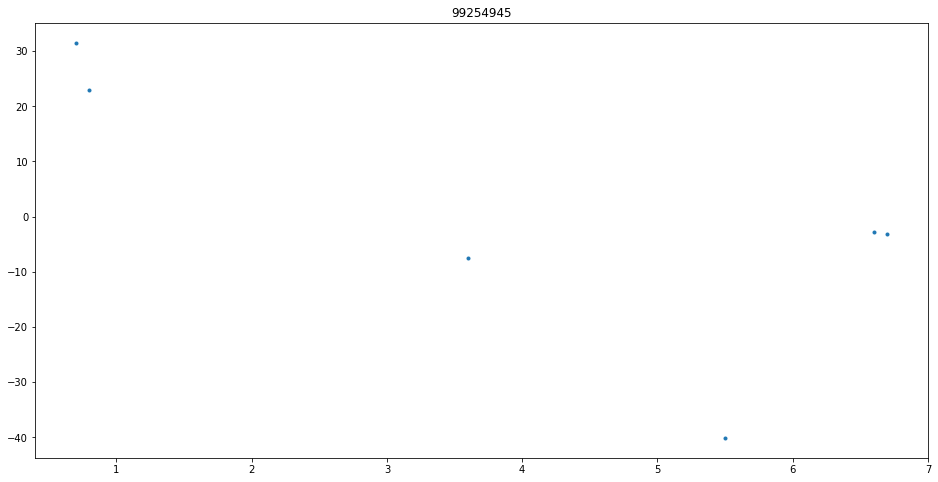

In [194]:
allvisbeat = allvis[allvis['APOGEE_ID']==jk_row['APOGEE_ID']]
print(allvisbeat.info)
fig,ax=plt.subplots()
ax.errorbar(allvisbeat['MJD']%7.7,allvisbeat['VREL'],yerr=allvisbeat['VRELERR'],fmt='.')
ax.set_title(jk_row['ID'])
allvisbeat.write('dr17_joker/tic_beatdrop_system_apogee_dat.fits',format='fits')

In [278]:
print(jk_row['APOGEE_ID'])

2M11171977+3943032


In [190]:
print(hq_jk_allstar_tess_edr3.info)
hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['APOGEE_ID'] == jk_row['APOGEE_ID']])


<Table length=2636>
              name                dtype       unit                                          description                                          class     n_bad
-------------------------------- ------- ------------- -------------------------------------------------------------------------------------- ------------ -----
                       APOGEE_ID bytes30                                                                                                            Column     0
                        n_visits   int64                                                                                                      MaskedColumn     0
                           MAP_P float64             d                                                                                              Column     0
                       MAP_P_err float64             d                                                                                              Column     0
              

#### reproduce lightcurve for TIC 165453878 (just cool)

['TIC', '165453878']
2.7082708270827083 d


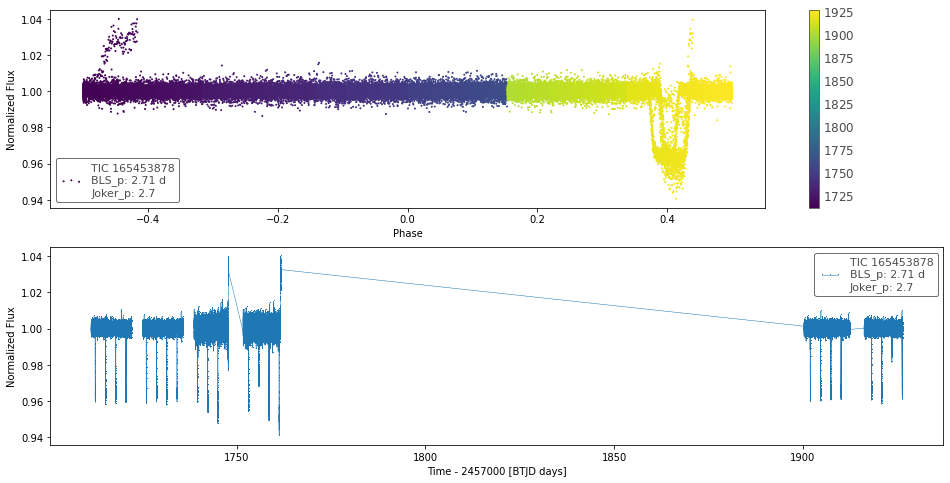

In [161]:
target_tic = 'TIC 165453878'

target_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = target_lk.download_all(quality_bitmask='hardest').stitch().flatten()

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
periods = np.linspace(1,20,10000)
# durs = np.linspace(0.001,0.09,100)

tic_periodogram = lks.to_periodogram(method='bls', period=periods, 
                                     frequency_factor=1000,)
per = tic_periodogram.period_at_max_power
print(lks.Label.split(' '))
print(tic_periodogram.period_at_max_power)
dur = tic_periodogram.duration_at_max_power
t0 = tic_periodogram.transit_time_at_max_power

fig,ax = plt.subplots(nrows=2, ncols=1)
sawtoothfig = lks.fold(period=per, 
           normalize_phase=True,
          ).scatter(ax=ax.flatten()[0], marker='o',s=1,c=lks.time.value,
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))

lks.plot(marker=',',ls=None,ax=ax.flatten()[1],
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
# sawtoothunfolded = lks.plot(ax=ax,
#                     label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
fig.savefig("figs/sawtooth_lightcurve_folded_and_unfolded.png",dpi=150,bbox_inches='tight')





#### reproduce lightcurve for TIC 164527723 (the biggun)

['TIC', '164527723']
2.739892875367309 d


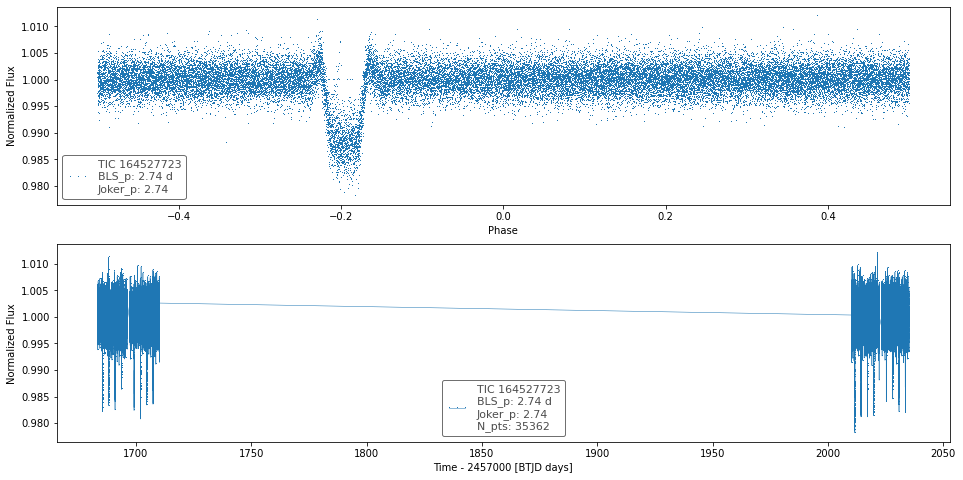

In [147]:
target_tic = 'TIC 164527723'

target_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = target_lk.download_all(quality_bitmask='hardest').stitch().flatten()

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
# periods = np.linspace(1,20,10000)
# durs = np.linspace(0.001,0.09,100)

tic_periodogram = lks.to_periodogram(method='bls', period=periods, 
                                     frequency_factor=1000,)
per = tic_periodogram.period_at_max_power
print(lks.Label.split(' '))
print(tic_periodogram.period_at_max_power)
dur = tic_periodogram.duration_at_max_power
t0 = tic_periodogram.transit_time_at_max_power

fig,ax = plt.subplots(nrows=2, ncols=1)
sawtoothfig = lks.fold(period=per, 
           normalize_phase=True,
          ).plot(ax=ax.flatten()[0], marker=',',ls='None',
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))

lks.plot(marker=',',ls=None,ax=ax.flatten()[1],
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2))+'\nN_pts: '+str(len(lks.flux)))
# sawtoothunfolded = lks.plot(ax=ax,
#                     label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))
fig.savefig("figs/sawtooth_lightcurve_folded_and_unfolded.png",dpi=150,bbox_inches='tight')






##### systematically going through the 104 systems and finding which have the most apogee RV visits AND something in their TESS lc

In [245]:
n_visits = 0
most_vis_id = 0
checked_ids = [
            '230064750','232540911','236378504','307752346','461618287','297823453','392381322',
            '162555615','406801175','307857044','144424576','144441148','450325128'
              ]

unchecked_ids = np.array(ids_w_lks)[~np.in1d(ids_w_lks, checked_ids)]

for ids in tqdm(unchecked_ids):
    mergedata = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID'] == int(ids)]
    visdata = allvis[allvis['APOGEE_ID'] == mergedata['APOGEE_ID']]
    if len(visdata['VREL']) > n_visits:
        n_visits = len(visdata['VREL'])
        most_vis_id = ids
        

100%|███████████████████████████████████████████| 91/91 [00:16<00:00,  5.42it/s]


In [246]:
print(n_visits, most_vis_id)

26 20215452


#### TIC 20215452 --- Has 26 RV measurements in APOGEE: good candidate for pymc3

In [118]:
target_tic = 'TIC 20215452'

target_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = target_lk.download_all(quality_bitmask='hardest').stitch(
        ).flatten(window_length=201)#.remove_outliers(sigma_lower=10**9, sigma_upper=.5)

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
print(joker_per, jk_row['MAP_P_err'])


3.067790985107422 8.047527194932069e-05


0.5953533130814371 d 1956.3036026548211 0.043000000000000003 d


<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

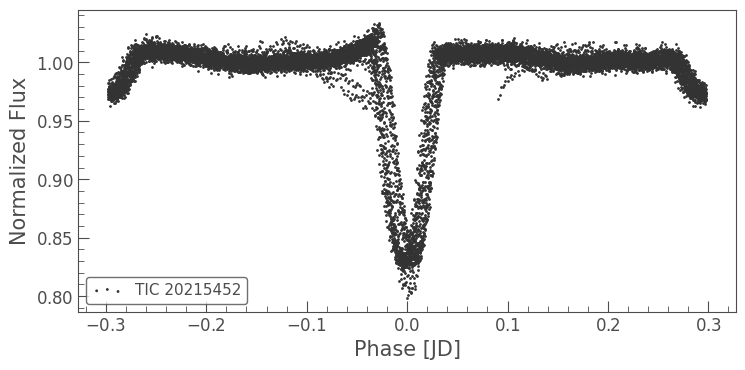

In [119]:
lks = lks.remove_nans()  #[lks.remove_nans()]
star1_bls = lks.to_periodogram('bls',
                                period=np.exp(np.linspace(np.log(0.1), np.log(100),1000)),
                                frequency_factor = 1000, duration=np.linspace(0.005,0.09,100))
star1_per = star1_bls.period_at_max_power
star1_t0 = star1_bls.transit_time_at_max_power
star1_dur = star1_bls.duration_at_max_power
print(star1_per, star1_t0, star1_dur)
lks.fold(period=star1_per, epoch_time=star1_t0).scatter()

In [95]:
star1_mask = star1_bls.get_transit_mask(period=star1_per,
                                 transit_time=star1_t0,
                                 duration=star1_dur)

star2_bls = lks[~star1_mask].to_periodogram('bls',
                                period=np.exp(np.linspace(np.log(0.50), np.log(100),1000)),
                                frequency_factor = 1000, duration=np.linspace(0.005,0.49,100))


11.54897217766287 d 1901.7789219793171 0.064 d


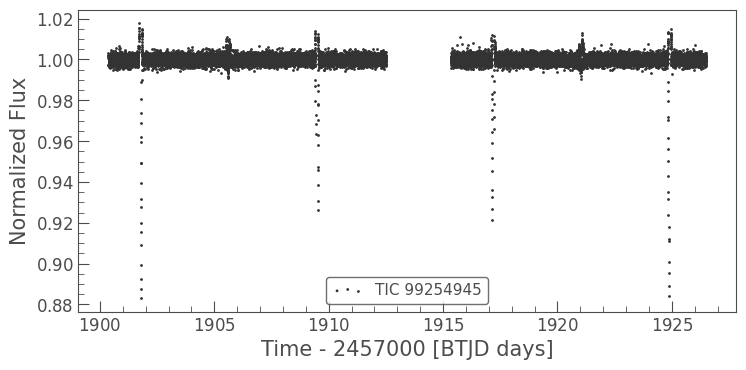

In [96]:
star2_per = star2_bls.period_at_max_power
star2_t0 = star2_bls.transit_time_at_max_power
star2_dur = star2_bls.duration_at_max_power
# allvisdata = allvis[allvis['APOGEE_ID']==jk_row['APOGEE_ID']]
print(star2_per, star2_t0, star2_dur)
lks[~star1_mask].scatter()#fold(star2_per, star2_t0).scatter()
star2_mask = star2_bls.get_transit_mask(period=star2_per,
                                 transit_time=star2_t0,
                                 duration=star2_dur)

(-0.5, 0.5)

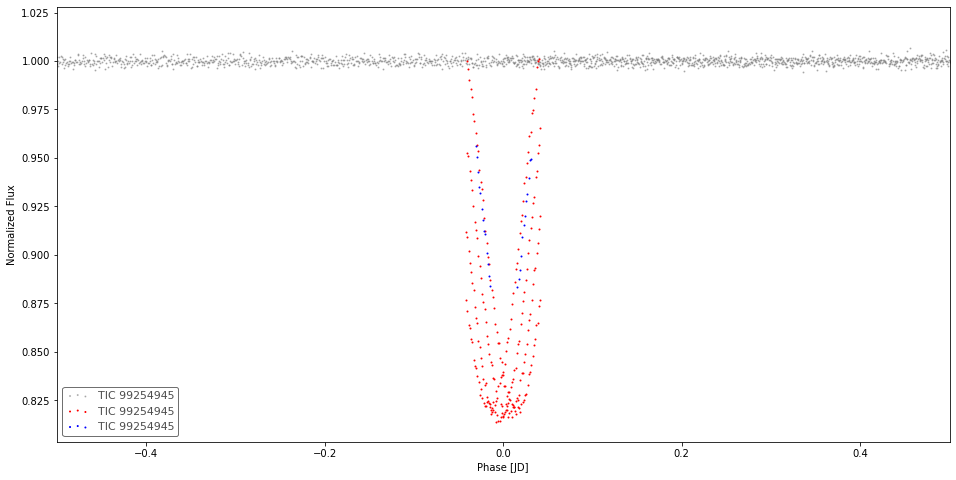

In [107]:
fig,ax = plt.subplots()
lks_w0s1 = lks[~star1_mask]
lks_w0s2 = lks_w0s1[~star2_mask].fold(period=11.5).scatter(ax=ax,c='gray',alpha=0.5,zorder=0)
lks[star1_mask].fold(star1_per, star1_t0).scatter(ax=ax, c='red',zorder=1)
lks_w0s1[star2_mask].fold(star2_per, star2_t0).scatter(ax=ax, c='blue', zorder=2)
ax.set_xlim(-.5,.5)

In [259]:
allvisdata.write(f'dr17_joker/tic{20215452}_apogee_visit_data.fits', format='fits')

<ErrorbarContainer object of 3 artists>

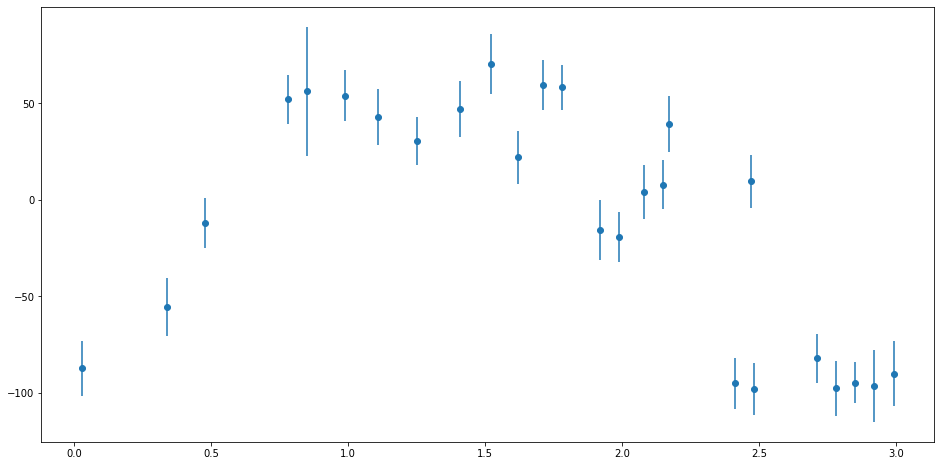

In [260]:
fig,ax = plt.subplots()

ax.errorbar(allvisdata['MJD']%3.07, allvisdata['VREL'],fmt='o', yerr=100*allvisdata['VRELERR'])

6.490360736846924 0.004969656746367068
['TIC', '258108067']
6.485391080100557 d


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

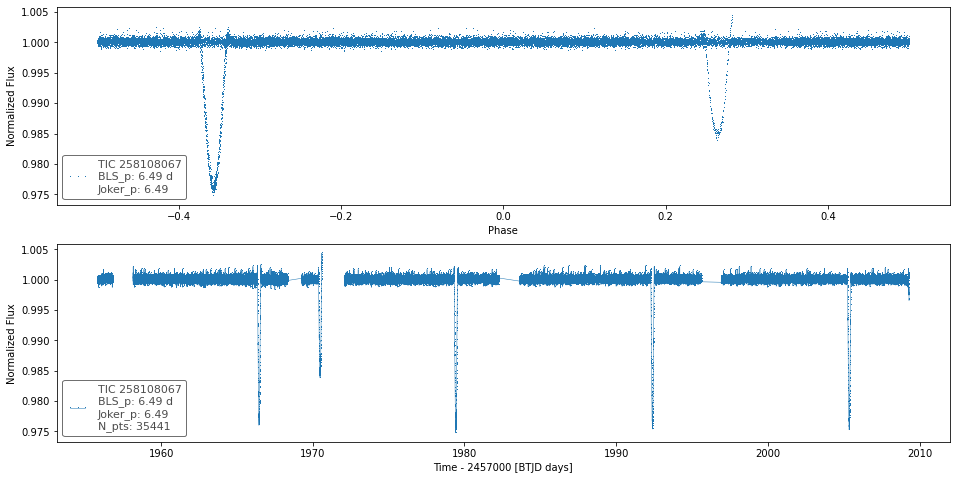

In [263]:

target_tic = 'TIC 258108067'

target_lk = lk.search_lightcurve(target_tic,
             mission='TESS',
            cadence='short',
            author='SPOC'
             )

lks = target_lk.download_all(quality_bitmask='hardest').stitch().flatten()

jk_row = hq_jk_allstar_tess_edr3[hq_jk_allstar_tess_edr3['ID']==int(target_tic.split(' ')[1])][0]
periods = np.linspace(max(0.34,jk_row['MAP_P']-jk_row['MAP_P_err']), 
                    min(jk_row['MAP_P']+0.5*jk_row['MAP_P'],jk_row['MAP_P']+jk_row['MAP_P_err'])
                      ,1000)
joker_per = jk_row['MAP_P']
print(joker_per, jk_row['MAP_P_err'])
# periods = np.linspace(1,20,10000)
# durs = np.linspace(0.001,0.09,100)

tic_periodogram = lks.to_periodogram(method='bls', period=periods, 
                                     frequency_factor=100,)
per = tic_periodogram.period_at_max_power
print(lks.Label.split(' '))
print(tic_periodogram.period_at_max_power)
dur = tic_periodogram.duration_at_max_power
t0 = tic_periodogram.transit_time_at_max_power

fig,ax = plt.subplots(nrows=2, ncols=1)
ticfig = lks.fold(period=per, 
           normalize_phase=True,
          ).plot(ax=ax.flatten()[0], marker=',',ls='None',
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2)))

lks.plot(marker=',',ls=None,ax=ax.flatten()[1],
        label=lks.Label+'\nBLS_p: '+str(np.round(per,2))+'\nJoker_p: '+str(np.round(joker_per,2))+'\nN_pts: '+str(len(lks.flux)))



0.5120448191934308 0.22108738124370575


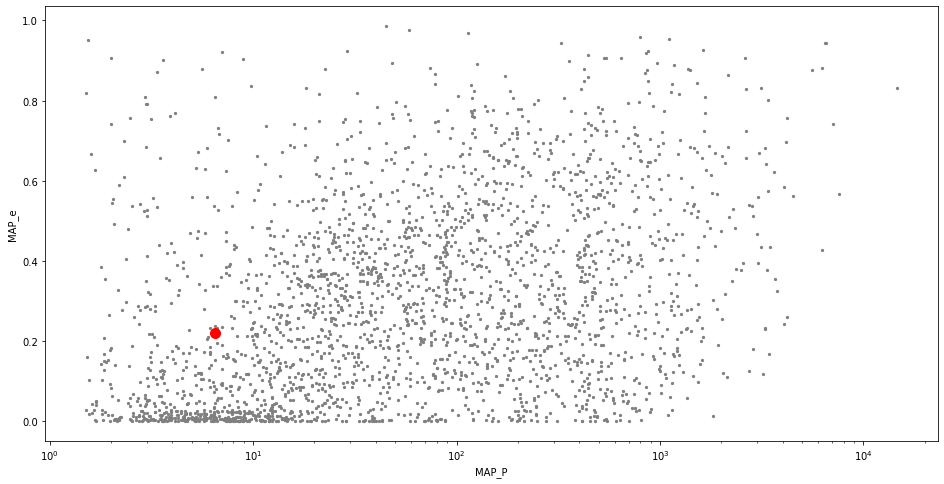

In [276]:
fig,ax = plt.subplots()
ax.scatter(hq_jk_allstar_tess_edr3['MAP_P'], hq_jk_allstar_tess_edr3['MAP_e'],s=5,c='gray',label='unimodal')
ax.scatter(jk_row['MAP_P'], jk_row['MAP_e'],marker='o',label=f'TIC {258108067}',c='red',s=100)
ax.set_xscale('log')
ax.set_ylabel("MAP_e")
ax.set_xlabel("MAP_P")
print(jk_row['MAP_omega'], jk_row['MAP_e'])